In [15]:
import numpy as np
import cv2

In [ ]:
img = cv2.imread("/content/dora.jpg")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


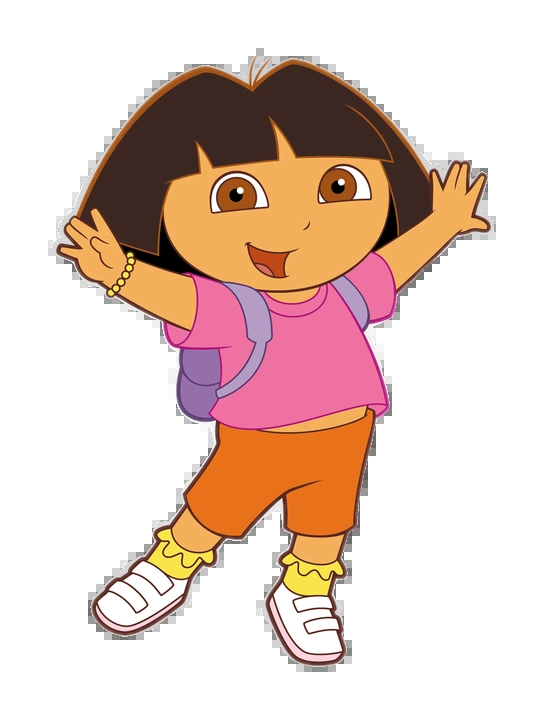

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

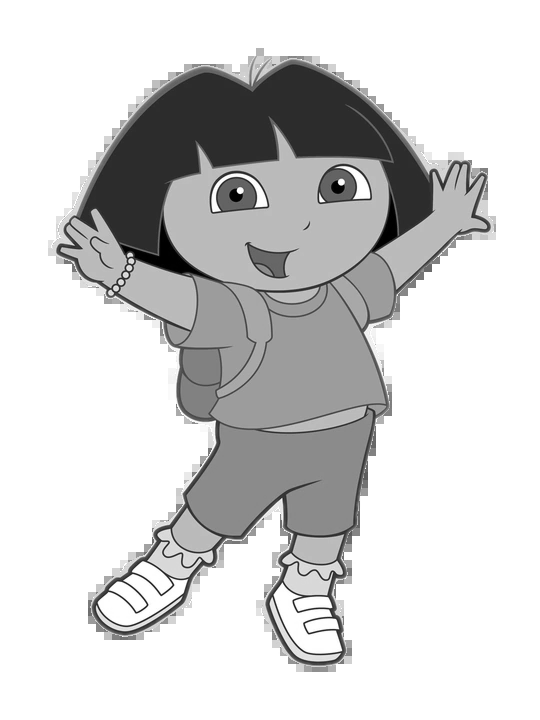

In [20]:
dora1 = cv2.imread("/content/dora.jpg",0)
cv2_imshow(dora1)

In [22]:
cv2.imwrite("dora11.jpg",dora1)

True

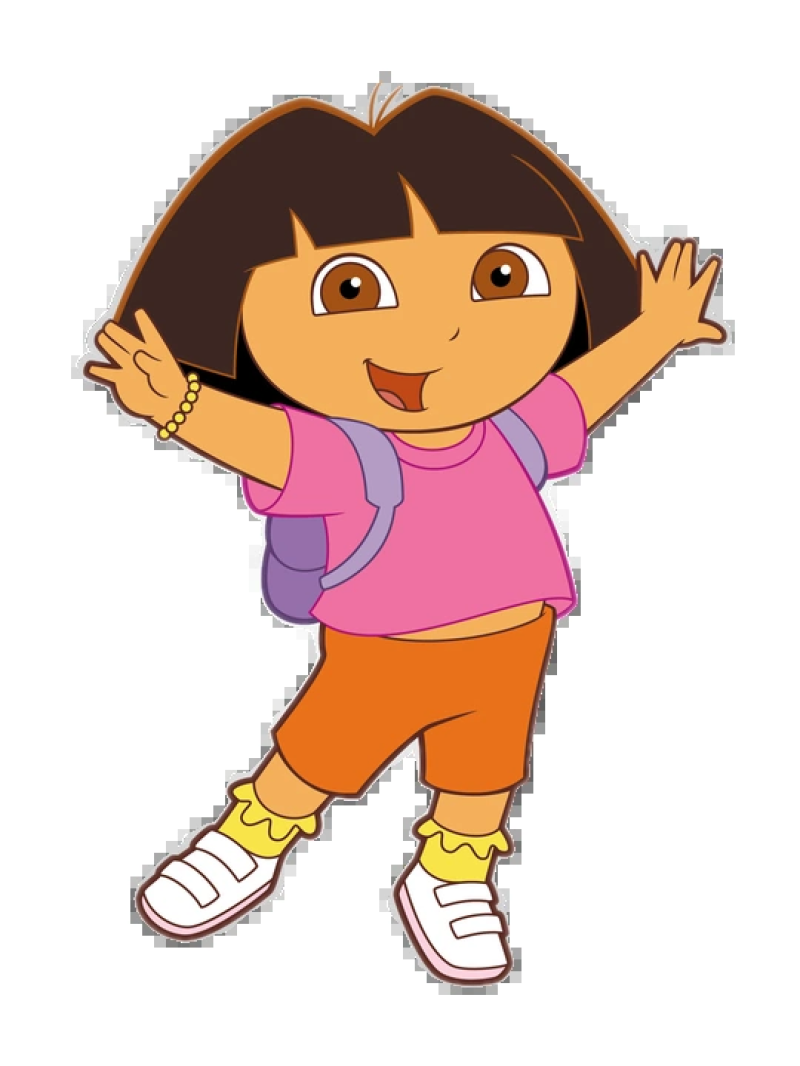

In [26]:
import imutils
img12 = imutils.resize(img, width=800)
cv2_imshow(img12)


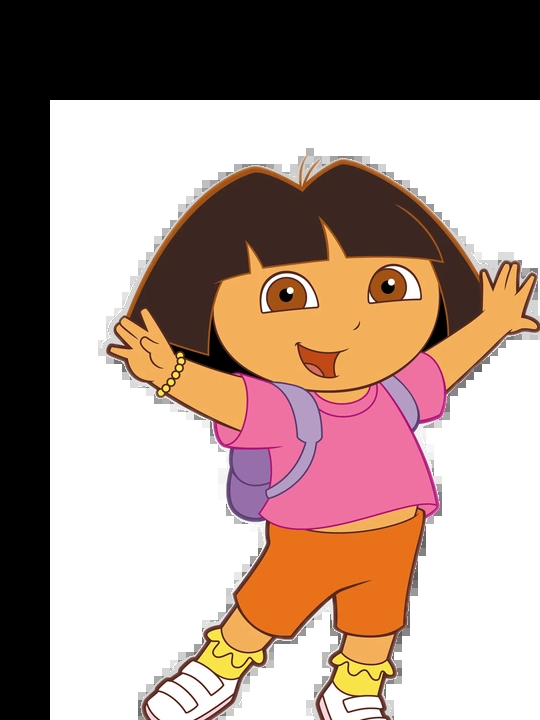

In [30]:
import imutils
shifted = imutils.translate(img, 50, 100)
cv2_imshow(shifted)

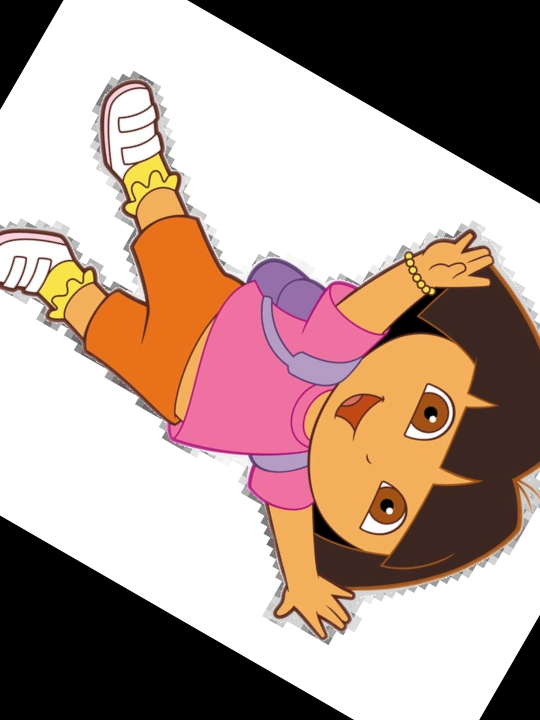

In [32]:
rotated_sight = imutils.rotate(img, 240)
cv2_imshow(rotated_sight)

In [39]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2022-09-12 08:37:56--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2022-09-12 08:37:56 (47.0 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2022-09-12 08:37:56--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [41]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt,model)

[INFO] loading model...


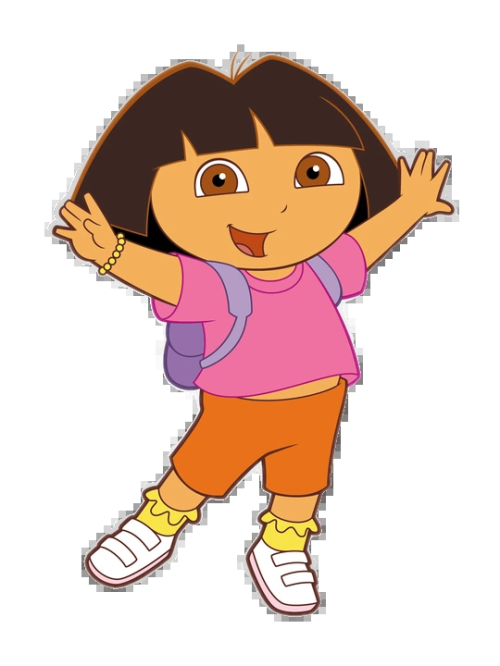

In [43]:
img12 = imutils.resize(img, width=500)
cv2_imshow(img12)

In [50]:
blob = cv2.dnn.blobFromImage(cv2.resize(img12, (300, 300)), 1.0,(300, 300), (104.0, 177.0, 123.0))
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [53]:
(h, w) = img12.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(img12, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

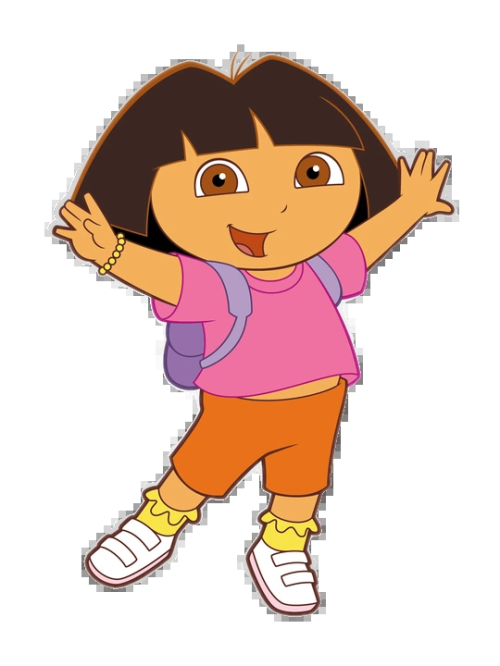

-1

In [54]:
for i in range(0, detections.shape[2]):
	# extract the confidence (i.e., probability) associated with the
	# prediction
	confidence = detections[0, 0, i, 2]
	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the
		# object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
 
		# draw the bounding box of the face along with the associated
		# probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(img12, (startX, startY), (endX, endY),
			(0, 0, 255), 2)
		cv2.putText(img12, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
# show the output image
cv2_imshow(img12)
cv2.waitKey(0)